# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('C:/Users/Dell/Desktop/Customer_churn_prediction/cleaned_telco_data.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.850000,29.850000,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.950001,1889.500000,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.849998,108.150002,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.299999,1840.750000,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.699997,151.649994,1


In [3]:
df.shape

(5043, 20)

In [4]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

## Analysis

In [5]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, SeniorCitizen, Partner, Dependents

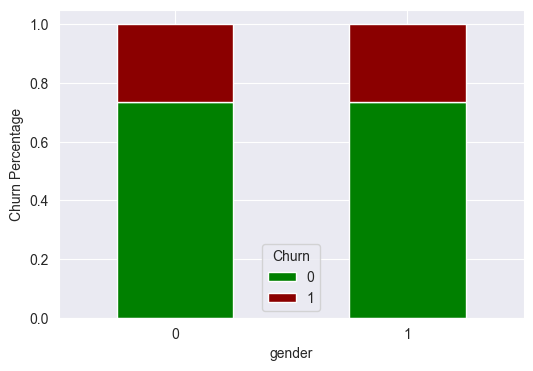

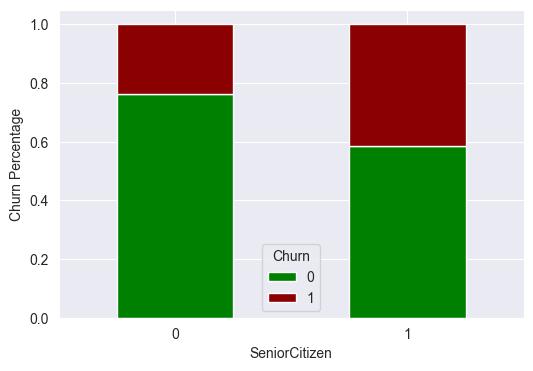

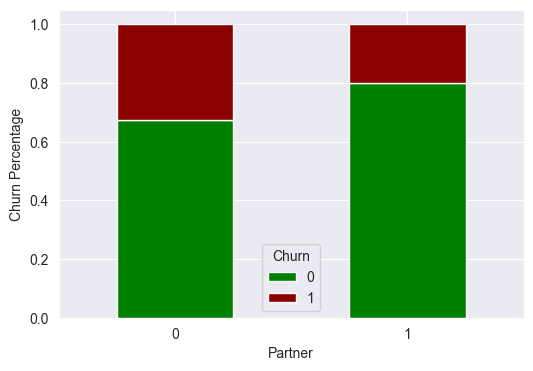

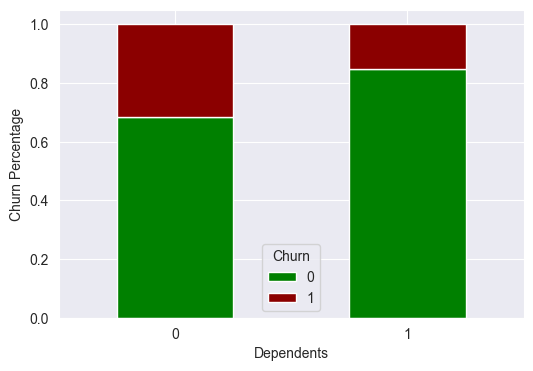

In [7]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

From above plots, we can say following:
- Gender alone does not help us predict the customer churn.
- If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

In [8]:
df[(df.SeniorCitizen == 0) & (df.Partner == 1) & (df.Dependents == 1)].Churn.value_counts()

Churn
0    1069
1     168
Name: count, dtype: int64

In [9]:
df[(df.SeniorCitizen == 0) & (df.Partner == 1) & (df.Dependents == 0)].Churn.value_counts()

Churn
0    617
1    181
Name: count, dtype: int64

In [10]:
df[(df.SeniorCitizen == 0) & (df.Partner == 0) & (df.Dependents == 1)].Churn.value_counts()

Churn
0    204
1     53
Name: count, dtype: int64

In [11]:
df[(df.SeniorCitizen == 0) & (df.Partner == 0) & (df.Dependents == 1)].Churn.value_counts()

Churn
0    204
1     53
Name: count, dtype: int64

### Tenure

In [12]:
df['tenure'].describe()

count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [13]:
df['tenure'].value_counts().head(10)

tenure
1     434
72    257
2     167
3     144
71    124
4     115
5      98
7      94
8      89
12     89
Name: count, dtype: int64

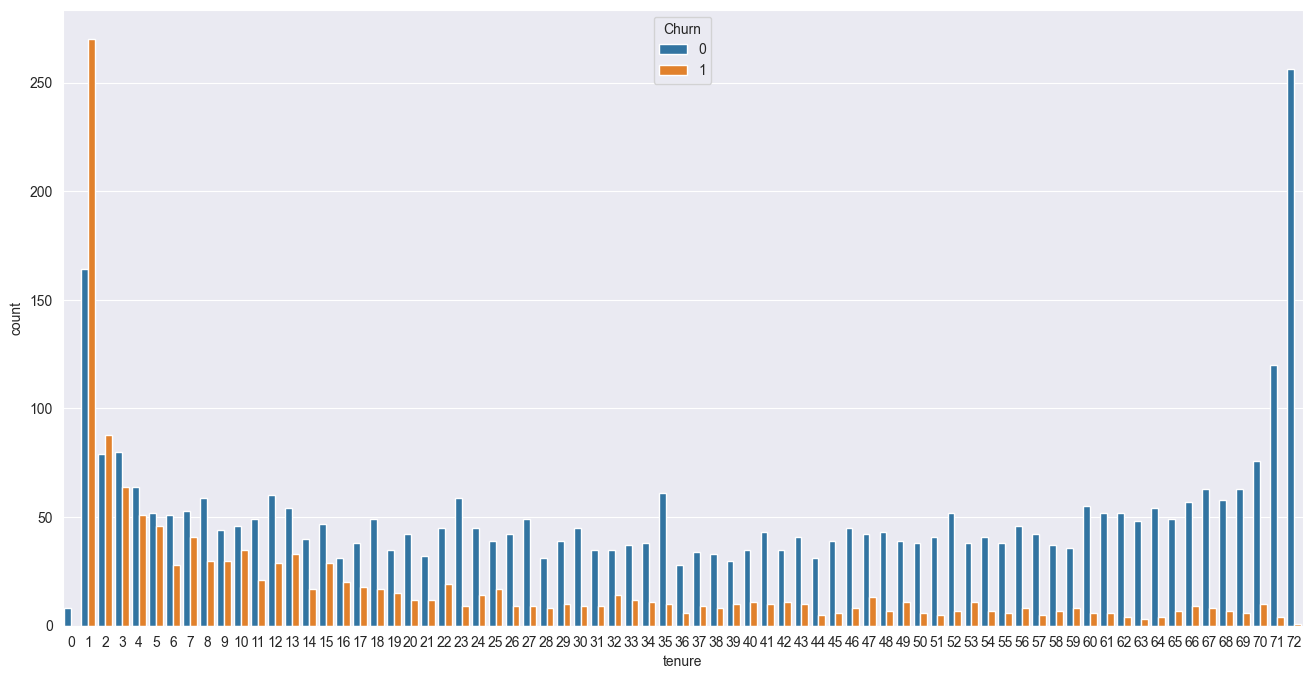

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [15]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [16]:
df["tenure_group"].value_counts()

tenure_group
1    1542
6    1017
2     732
3     603
5     590
4     559
Name: count, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

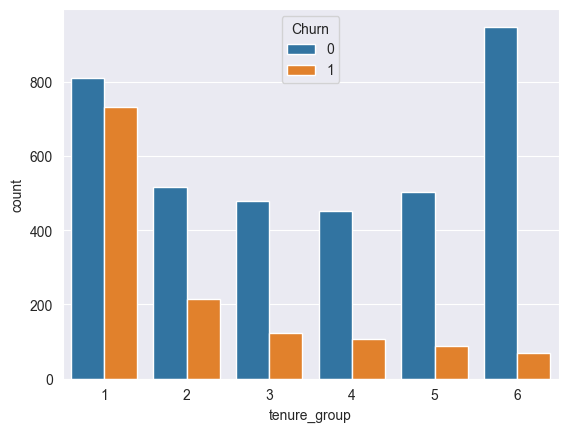

In [17]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

### Phone Service and MultipleLines 

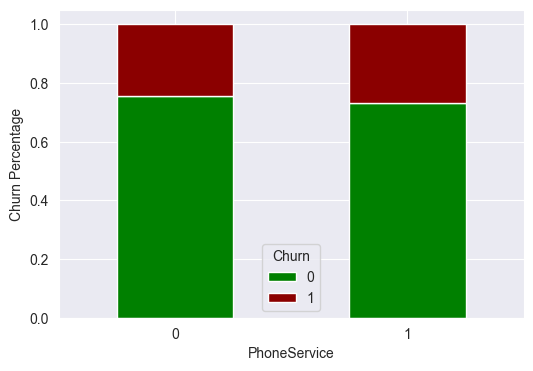

In [18]:
stacked_plot(df, "PhoneService", "Churn")

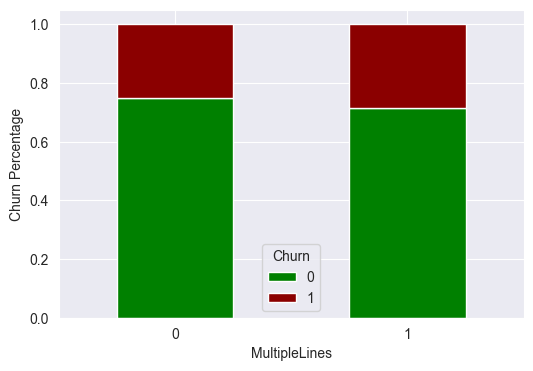

In [19]:
stacked_plot(df, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

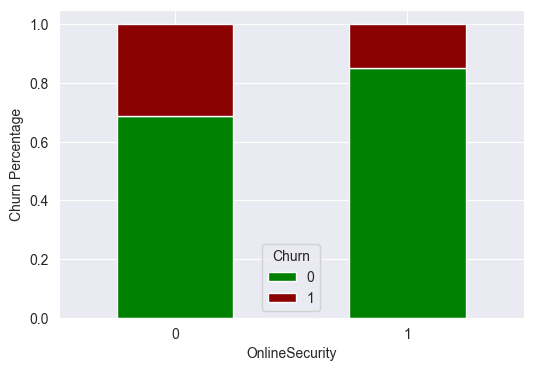

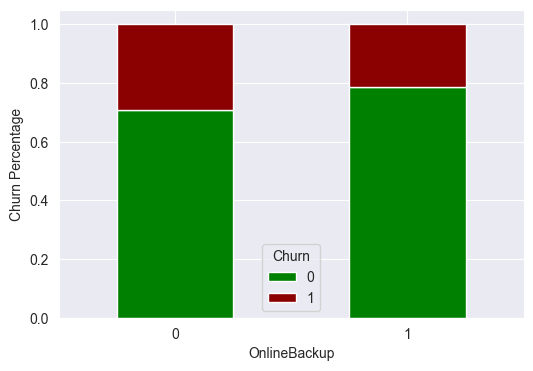

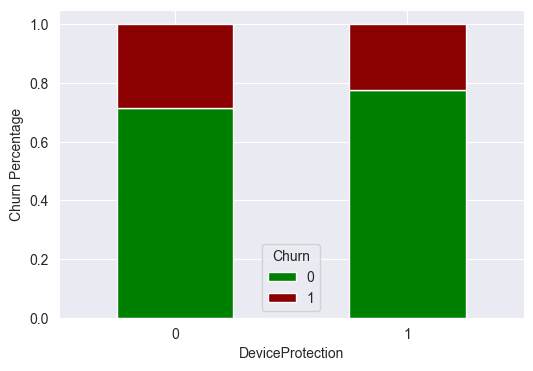

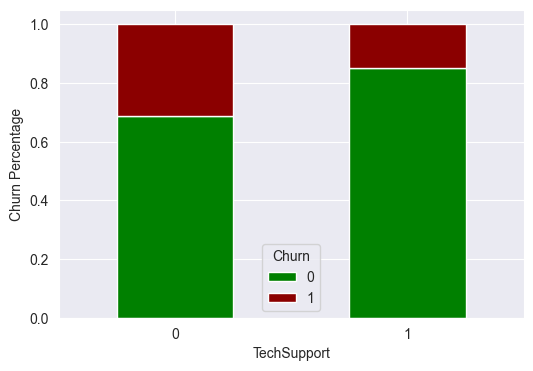

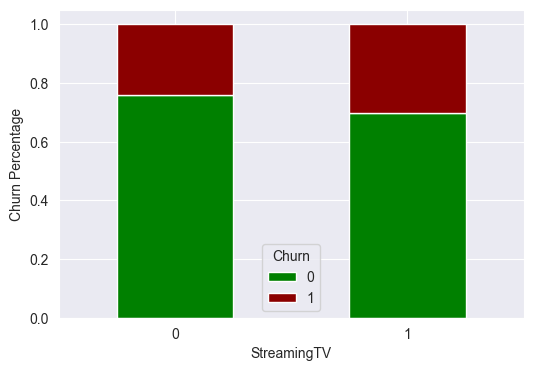

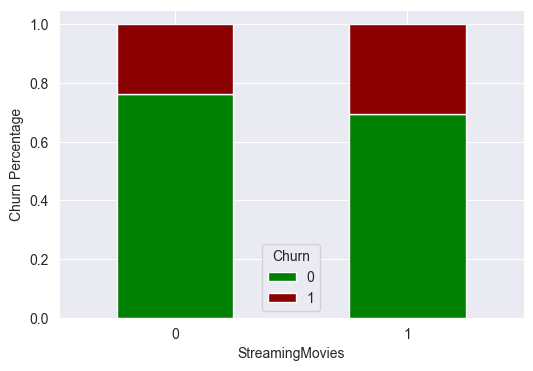

In [20]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

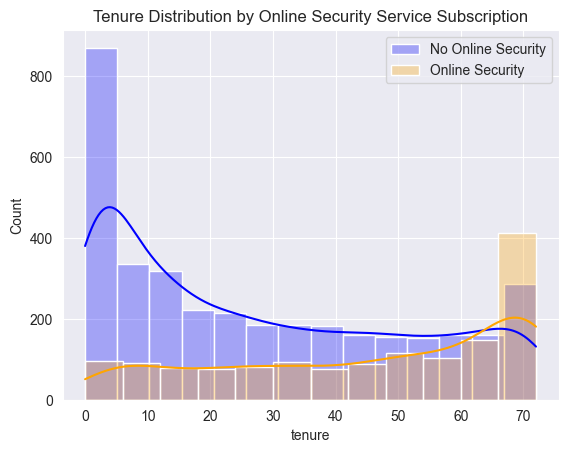

In [21]:
sns.histplot(df.tenure[df.OnlineSecurity == 0], color='blue', alpha=0.3, label='No Online Security', kde=True)
sns.histplot(df.tenure[df.OnlineSecurity == 1], color='orange', alpha=0.3, label='Online Security', kde=True)

plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

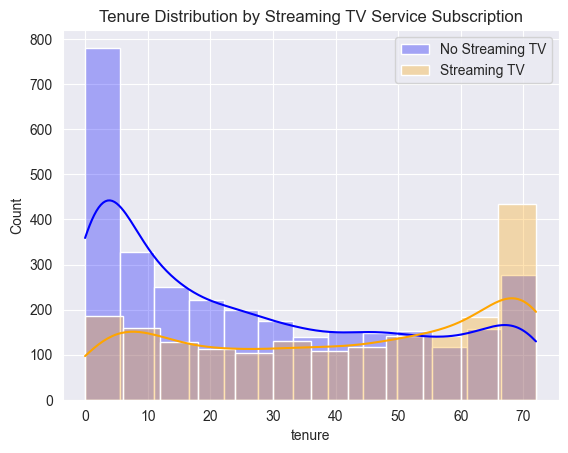

In [22]:
sns.histplot(df.tenure[df.StreamingTV == 0], color='blue', alpha=0.3, label='No Streaming TV', kde=True)
sns.histplot(df.tenure[df.StreamingTV == 1], color='orange', alpha=0.3, label='Streaming TV', kde=True)

plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

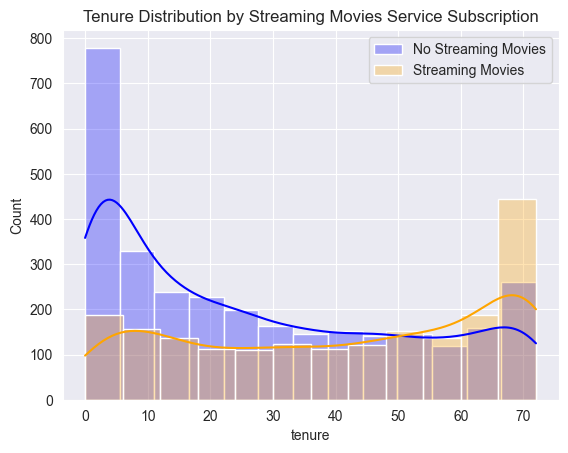

In [23]:
sns.histplot(df.tenure[df.StreamingMovies == 0], color='blue', alpha=0.3, label='No Streaming Movies', kde=True)
sns.histplot(df.tenure[df.StreamingMovies == 1], color='orange', alpha=0.3, label='Streaming Movies', kde=True)

plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

### InternetService

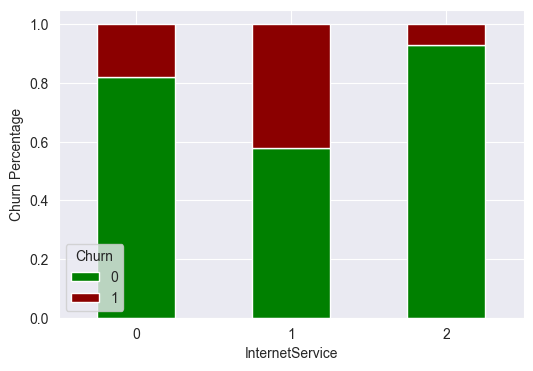

In [24]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

<Axes: xlabel='InternetService', ylabel='count'>

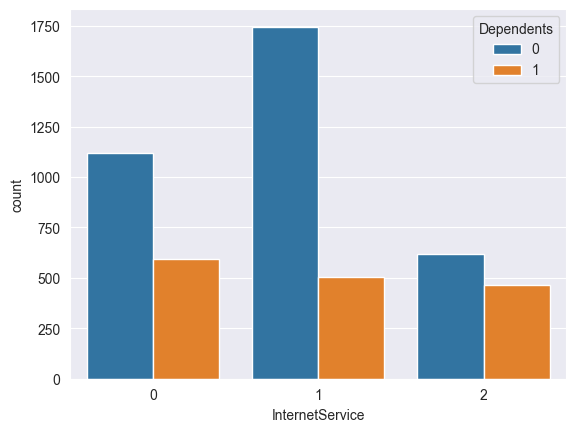

In [25]:
sns.countplot(x='InternetService', hue='Dependents', data=df)

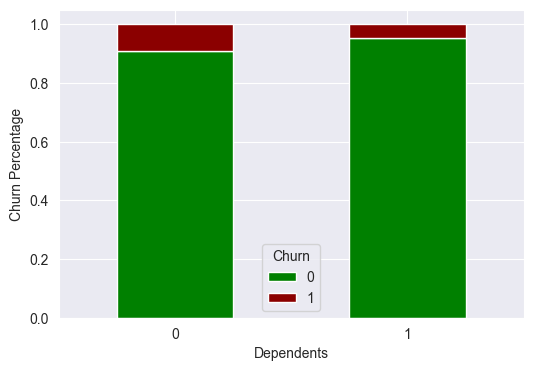

In [26]:
stacked_plot(df[df.InternetService == 2], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<Axes: xlabel='InternetService', ylabel='count'>

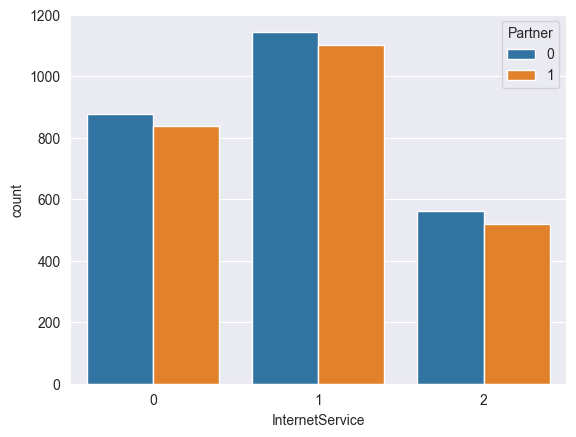

In [27]:
sns.countplot(x='InternetService', hue='Partner', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

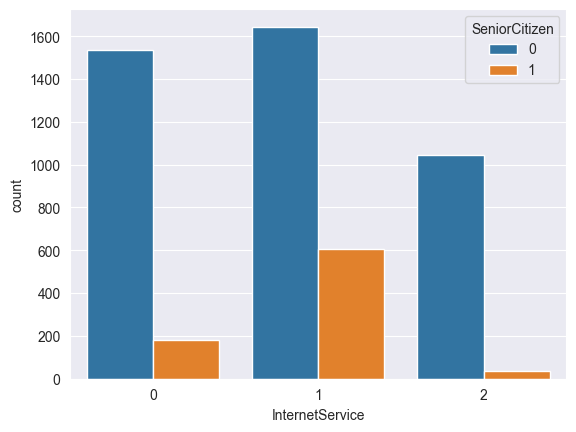

In [28]:
sns.countplot(x='InternetService', hue='SeniorCitizen', data=df)

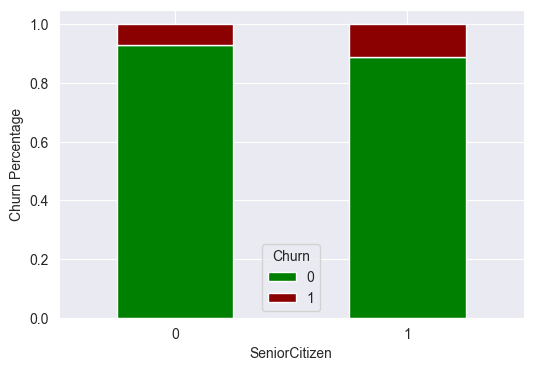

In [29]:
stacked_plot(df[df.InternetService == 2], "SeniorCitizen", "Churn")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

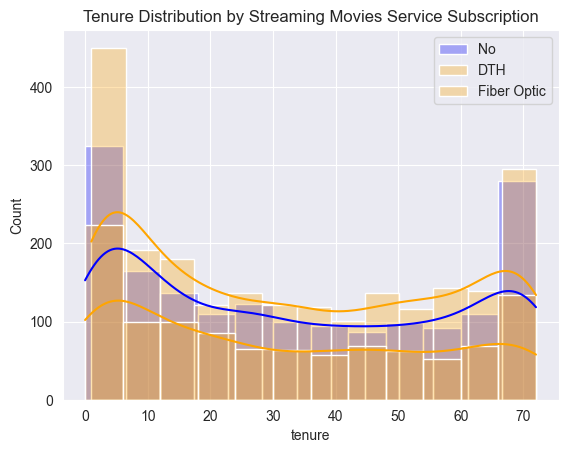

In [30]:
sns.histplot(df.tenure[df.InternetService == 0], color='blue', alpha=0.3, label='No', kde=True)
sns.histplot(df.tenure[df.InternetService == 1], color='orange', alpha=0.3, label='DTH', kde=True)
sns.histplot(df.tenure[df.InternetService == 2], color='orange', alpha=0.3, label='Fiber Optic', kde=True)

plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

In [40]:
df[df.InternetService == 0].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,2,29.850000,29.850000,0,1
1,0,0,0,0,34,1,0,0,1,0,...,0,0,0,1,0,3,56.950001,1889.500000,0,3
2,0,0,0,0,2,1,0,0,1,1,...,0,0,0,0,1,3,53.849998,108.150002,1,1
3,0,0,0,0,45,0,0,0,1,0,...,1,0,0,1,0,0,42.299999,1840.750000,0,4
7,1,0,0,0,10,0,0,0,1,0,...,0,0,0,0,0,3,29.750000,301.899994,0,1


In [41]:
df[df.InternetService == 0].OnlineSecurity.value_counts()

OnlineSecurity
0    879
1    836
Name: count, dtype: int64

In [42]:
df[df.InternetService == 0].OnlineBackup.value_counts()

OnlineBackup
0    954
1    761
Name: count, dtype: int64

In [43]:
df[df.InternetService == 0].DeviceProtection.value_counts()

DeviceProtection
0    962
1    753
Name: count, dtype: int64

In [44]:
df[df.InternetService == 0].TechSupport.value_counts()

TechSupport
0    866
1    849
Name: count, dtype: int64

In [45]:
df[df.InternetService == 0].StreamingMovies.value_counts()

StreamingMovies
0    1000
1     715
Name: count, dtype: int64

In [46]:
df[df.InternetService == 0].StreamingTV.value_counts()

StreamingTV
0    1043
1     672
Name: count, dtype: int64

We need to encode these variables to remove dependancy in the model.

### Contract

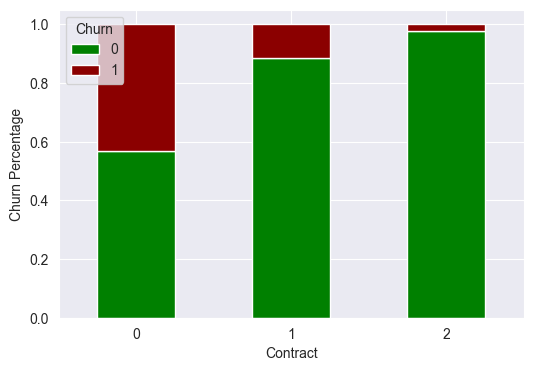

In [47]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<Axes: xlabel='InternetService', ylabel='count'>

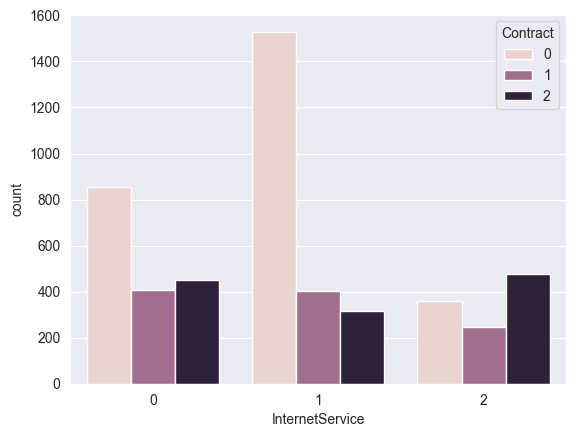

In [48]:
sns.countplot(x='InternetService', hue='Contract', data=df)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### PaymentMethod

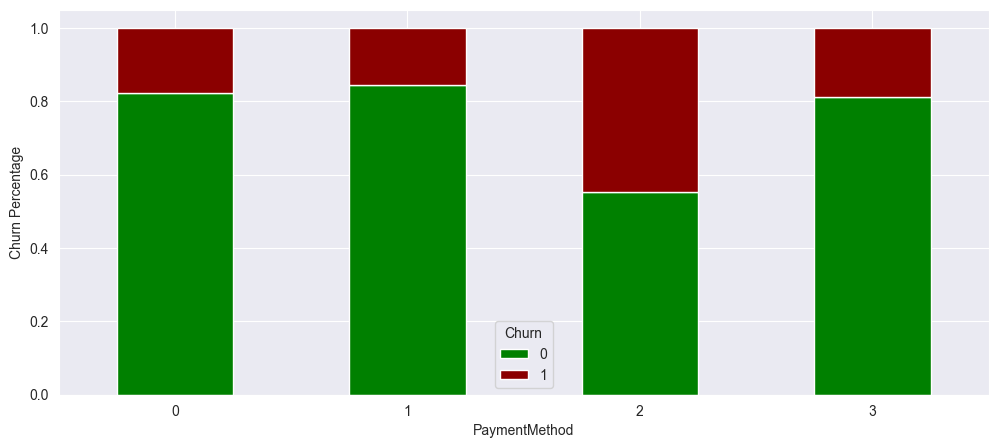

In [49]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high. 

<Axes: xlabel='PaymentMethod', ylabel='count'>

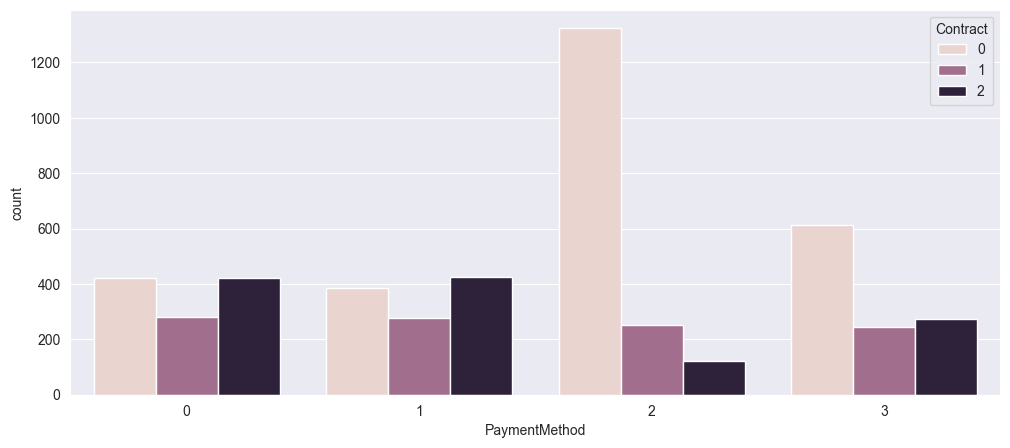

In [51]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x='PaymentMethod', hue='Contract', data=df)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment. 

### PaperlessBilling

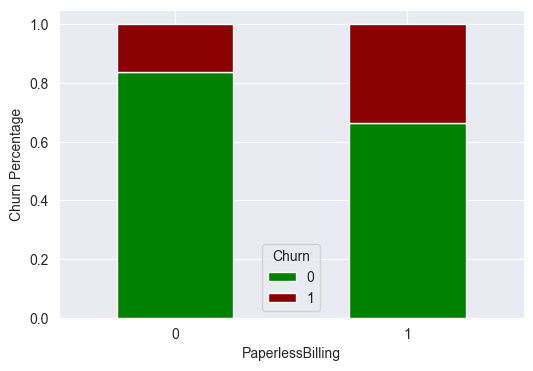

In [52]:
stacked_plot(df, "PaperlessBilling", "Churn")

### TotalCharges

In [53]:
df.TotalCharges.describe()

count    5040.000000
mean     2299.779068
std      2269.514986
min         0.000000
25%       416.212503
50%      1399.949988
75%      3858.900024
max      8670.100000
Name: TotalCharges, dtype: float64

In [55]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum() 

3

In [56]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
3218,0,0,1,1,0,1,0,2,0,0,...,0,0,0,1,1,3,19.70,NaN,0,1
4670,1,0,1,1,0,1,1,0,0,1,...,1,1,0,2,0,3,73.35,NaN,0,1
4754,0,0,0,1,0,1,1,0,1,1,...,1,0,0,2,1,0,61.90,NaN,0,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [57]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

False

In [59]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn==1]
Not_Churn = df[df.Churn==0]

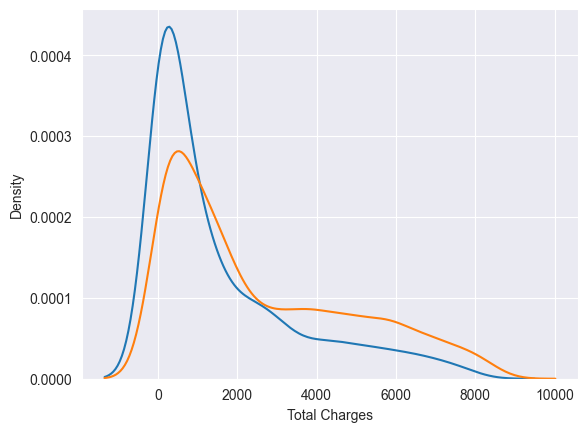

In [60]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

### Monthly Charges

In [61]:
df.MonthlyCharges.describe()

count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: MonthlyCharges, dtype: float64

In [62]:
df.MonthlyCharges.isna().sum()

0

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

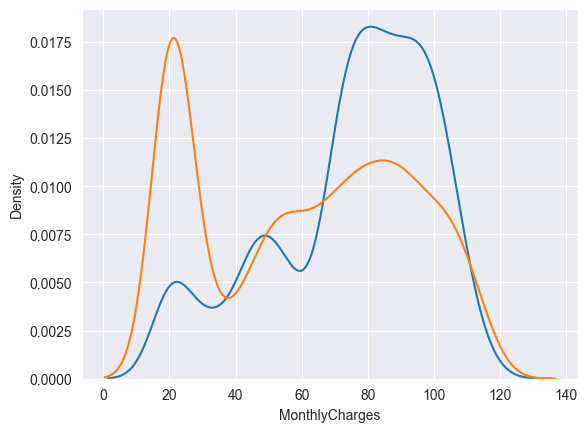

In [63]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [64]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99955625],
       [0.99955625, 1.        ]])

Let's keep total charges as it shows the interaction between tenure and monthly charges